In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [58]:
df = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")

In [59]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [60]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


**Check for missing values**

In [61]:
print("Missing values in each column:")
print(df.isna().sum())

Missing values in each column:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


**Handling missing values**

In [62]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna('No', inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

<ipython-input-62-2038696133>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
<ipython-input-62-2038696133>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

**Categorical Encoding**

In [63]:
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

**Visualization**

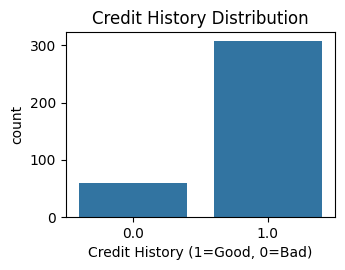

In [64]:
# Credit History Distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Credit_History', data=df)
plt.title('Credit History Distribution')
plt.xlabel('Credit History (1=Good, 0=Bad)')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Marital Status')

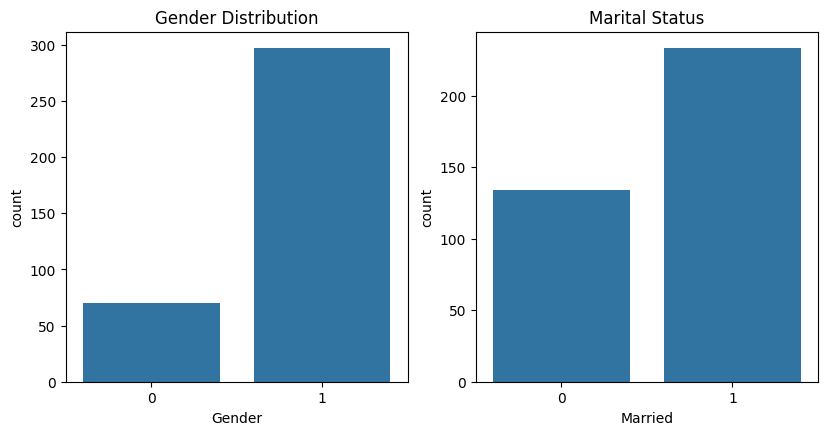

In [65]:
plt.figure(figsize=(15, 10))

# Gender Distribution
plt.subplot(2, 3, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')

# Marital Status
plt.subplot(2, 3, 2)
sns.countplot(x='Married', data=df)
plt.title('Marital Status')

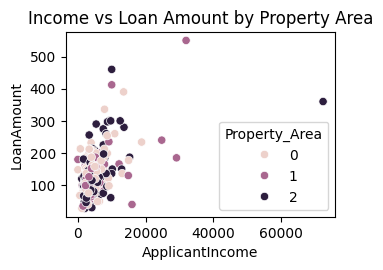

In [66]:
# By Property Area
plt.subplot(2, 2, 4)
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Property_Area', data=df)
plt.title('Income vs Loan Amount by Property Area')

plt.tight_layout()
plt.show()

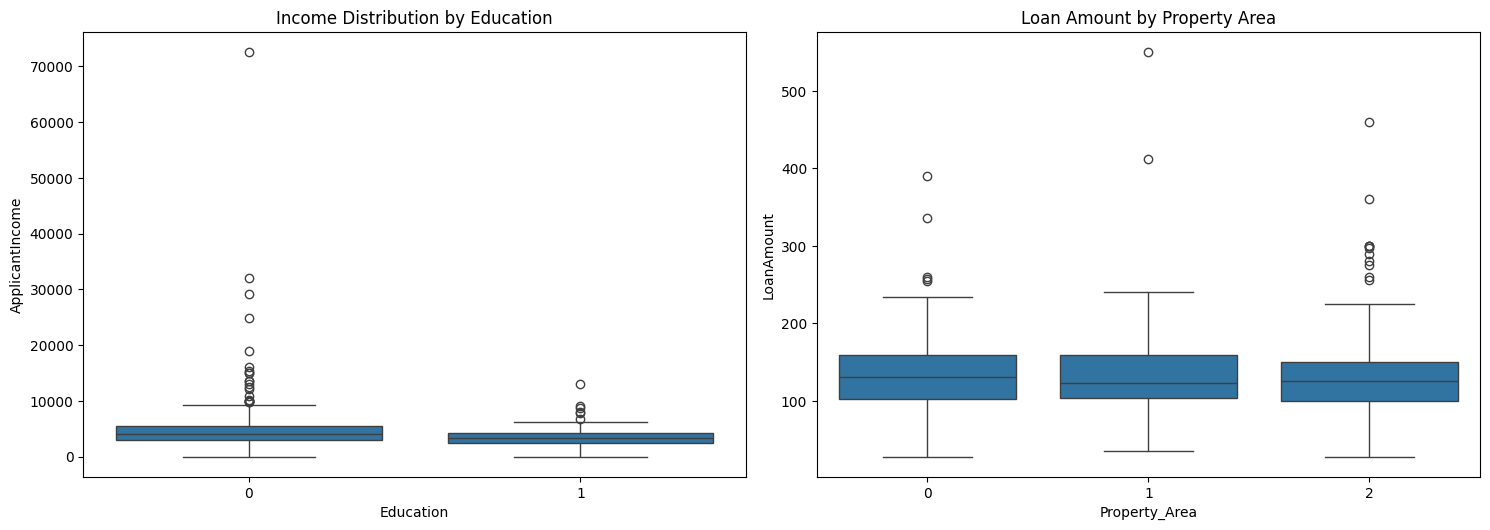

In [67]:
plt.figure(figsize=(15, 10))

# Applicant Income by Education
plt.subplot(2, 2, 1)
sns.boxplot(x='Education', y='ApplicantIncome', data=df)
plt.title('Income Distribution by Education')
# Loan Amount by Property Area
plt.subplot(2, 2, 2)
sns.boxplot(x='Property_Area', y='LoanAmount', data=df)
plt.title('Loan Amount by Property Area')

plt.tight_layout()
plt.show()